# THS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
import warnings
from IPython.display import Image

warnings.filterwarnings("ignore")
orbits = np.genfromtxt(r"OUT_250p.txt", delimiter = ' ', usecols = range(0,7), invalid_raise=False)

In [2]:
N = 250
b_ = []

# Crear 200 matrices similares a b_1 y b_2
for _ in range(N):
    matriz = np.zeros(shape=(int(len(orbits)/N),3))
    b_.append(matriz)

for j in range(N):
    for i in range(int(len(orbits)/N)):
        b_[j][i][0] = orbits[i*N+j][1]
        b_[j][i][1] = orbits[i*N+j][2]
        b_[j][i][2] = orbits[i*N+j][3]
        
print(b_[3])
print((len(b_[1])))

[[-0.92639579 -3.8666342   4.72022956]
 [-0.92829704 -3.86700377  4.71817219]
 [-0.93366378 -3.86808333  4.71242419]
 [-0.94328884 -3.87015379  4.70233499]
 [-0.95665635 -3.87331482  4.68879004]
 [-0.97571788 -3.87839746  4.67041499]
 [-1.00013165 -3.88590801  4.64849973]
 [-1.03360697 -3.89812942  4.62144323]
 [-1.08197448 -3.92051702  4.5886284 ]
 [-1.16483501 -3.9047759   4.51968883]
 [-1.19067457 -3.79787888  4.4411819 ]
 [-1.23417283 -3.72400905  4.35957617]
 [-1.28798703 -3.68388766  4.28480521]
 [-1.33945198 -3.6733549   4.23343603]
 [-1.36073191 -3.71663431  4.20560298]
 [-1.27432607 -3.62574449  4.15092506]
 [-1.2279186  -3.54008209  4.11183213]
 [-1.18897274 -3.46804374  4.09023296]
 [-1.1728529  -3.42183026  4.09231951]
 [-1.22121316 -3.40355963  4.07166175]
 [-1.28858845 -3.37585066  4.00070753]
 [-1.35896134 -3.35877878  3.92449602]
 [-1.37820076 -3.36508137  3.9007221 ]
 [-1.34293605 -3.33276812  3.8753814 ]
 [-1.29514114 -3.27721074  3.83397295]
 [-1.23986236 -3.20510116

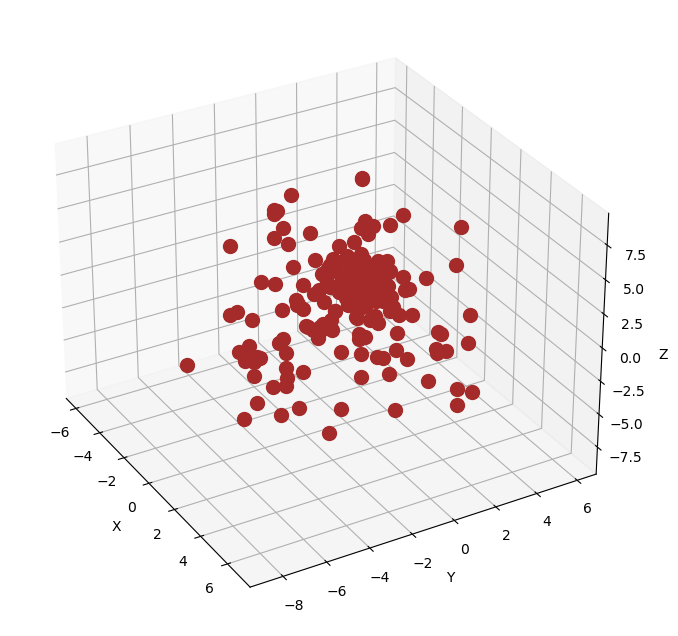

In [15]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection = '3d')
   
#b_1 = np.zeros(shape = (int(len(orbits)/200), 3))
#b_2 = np.zeros(shape = (int(len(orbits)/200), 3))

#for i in range(int(len(orbits)/200)):
    #for j in range(200):
        #b_[j][i][0] = orbits[i*200][1]
        #b_[j][i][1] = orbits[i*200][2]
        #b_[j][i][2] = orbits[i*200][3]

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#ax.set_xlim(b_2[:,0].min(),b_2[:,0].max())
#ax.set_ylim(b_2[:,1].min(),b_2[:,1].max())
#ax.set_zlim(b_2[:,2].min(),b_2[:,2].max())

for i in range(N):
    ax.scatter(b_[i][61,0], b_[i][61,1], b_[i][61,2], s = 100, color = 'brown')

ax.view_init(30, -30)
plt.savefig('THS.png', dpi = 300)
plt.show()

# Dispendious animation

In [4]:
for i in tqdm(range(len(b_[1]))):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(projection = '3d')
    
    for j in range(N):
        ax.scatter(b_[j][i,0], b_[j][i,1], b_[j][i,2], s = 100, color = 'blue')
    
    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)
    ax.set_zlim(-5,5)
    
    ax.set_title('THS')

    ax.view_init(30, -30)
    
    plt.savefig(f"{i}.png")
    plt.close()
    
from PIL import Image
import os

images = [Image.open(f"{i}.png") for i in range(len(b_[1]))]
images[0].save('THS.gif', save_all=True, append_images=images[1:], duration=100, loop=0)

for i in range (len(b_[1])):
    os.remove(f"{i}.png")

100%|███████████████████████████████████████████████████████████████████████████████████| 65/65 [02:33<00:00,  2.36s/it]


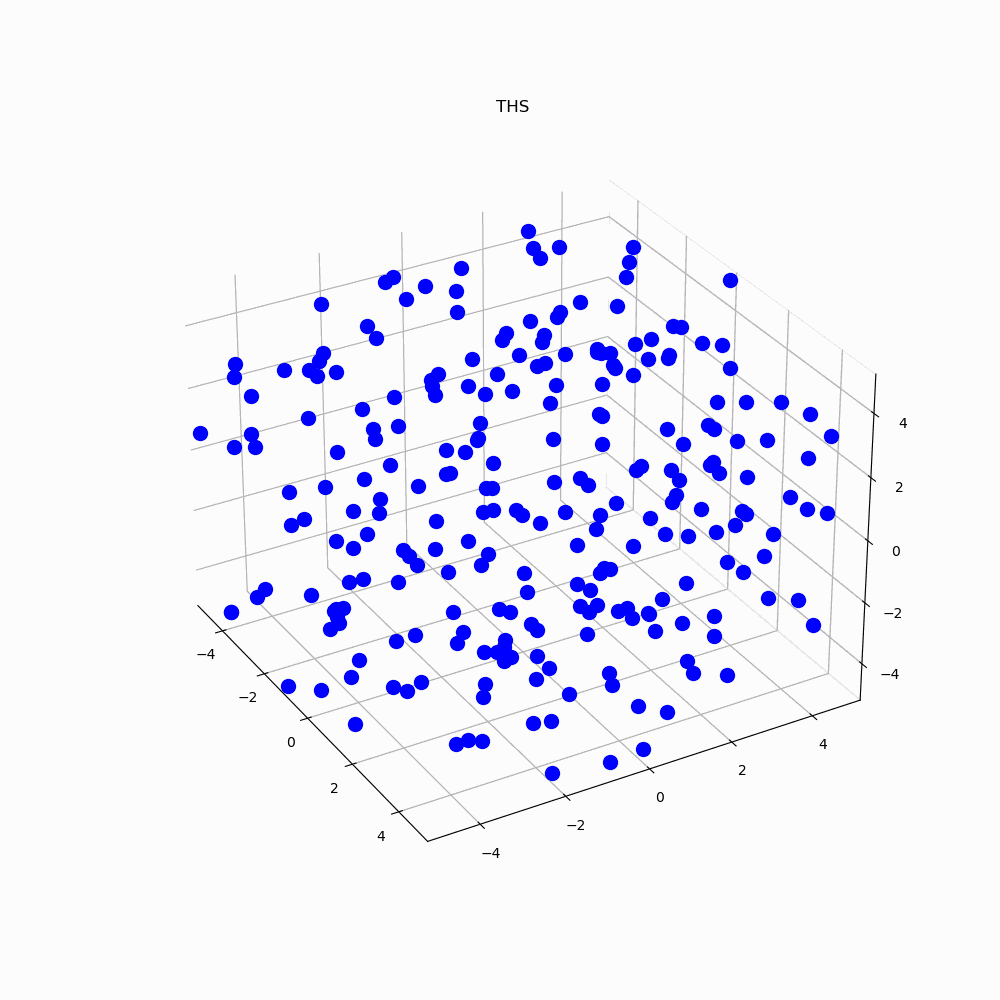

In [5]:
from IPython.display import Image

Image(filename='THS.gif')

# Fast animation

NameError: name 'b_2' is not defined

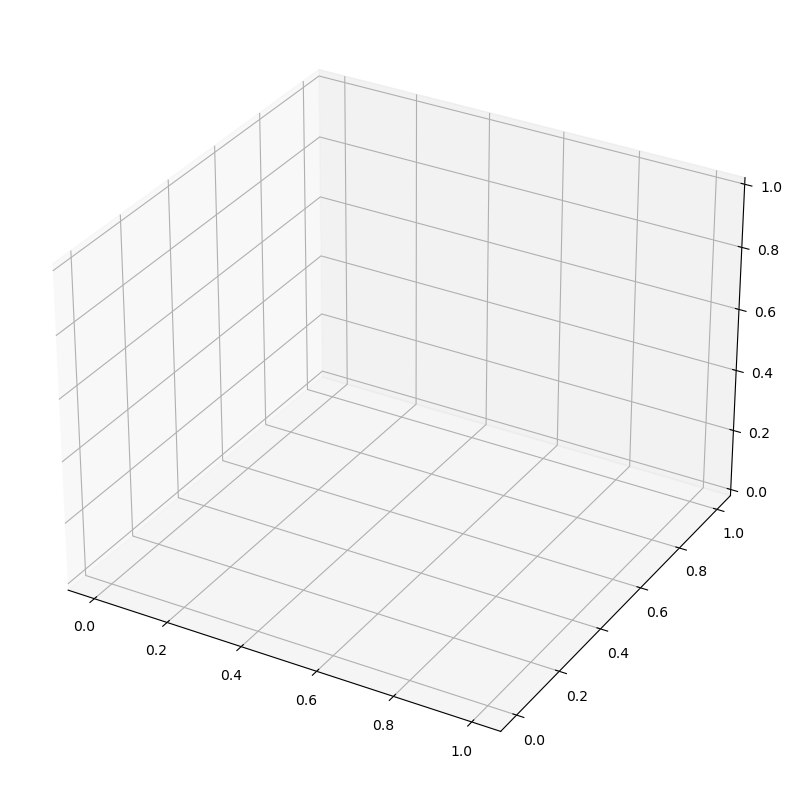

In [8]:
import numpy as np
import matplotlib
# matplotlib.use("Agg") # useful for a webserver case where you don't want to ever visualize the result live.
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter, PillowWriter

# Change to reflect your file location!
#plt.rcParams['animation.ffmpeg_path'] = 'C:\\Users\\spsha\\Desktop\\ffmpeg-4.4-full_build\\bin\\ffmpeg.exe'


# Fixing random state for reproducibility
np.random.seed(19680801)


metadata = dict(title='2 Body Problem', artist='Edoardo Santo')
writer = PillowWriter(fps=15, metadata=metadata)
#writer = FFMpegWriter(fps=15, metadata=metadata)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize = (10,10))

line1, = ax.plot([],[],[], color = 'red')
line2, = ax.plot([],[],[], color = 'blue')

ax.set_xlim(b_2[:,0].min()-0.01,b_2[:,0].max()+0.01)
ax.set_ylim(b_2[:,1].min()-0.01,b_2[:,1].max()+0.01)
ax.set_zlim(b_2[:,2].min()-0.01,b_2[:,2].max()+0.01)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('Pluto vs Sun orbit')

ax.scatter(0,0,0, s = 100, color = 'brown')

ax.view_init(30, -30)

xlist1 = []
xlist2 = []
ylist1 = []
ylist2 = []
zlist1 = []
zlist2 = []

with writer.saving(fig, "Pluto vs Sun orbit, lineplot.gif", 100):
    for i in tqdm(range(len(b_1))):
        
        xlist1.append(b_1[i][0])
        ylist1.append(b_1[i][1])
        zlist1.append(b_1[i][2])
        
        xlist2.append(b_2[i][0])
        ylist2.append(b_2[i][1])
        zlist2.append(b_2[i][2])
        
        line1.set_data(xlist1, ylist1)
        line1.set_3d_properties(zlist1)
        
        line2.set_data(xlist2, ylist2)
        line2.set_3d_properties(zlist2)
        
        writer.grab_frame()
        #plt.cla()

### Compute the radius from the center for every particle

In [28]:
def r (x,y,z):
    return (x**2+y**2+z**2)**0.5

In [29]:
rad_dist = np.empty((N, len(b_[0])))

for i in range(N):
    rad_dist[i, :] = r(b_[i][:, 0], b_[i][:, 1], b_[i][:, 2])

In [30]:
r_mean=np.empty(len(b_[0]))
r_median=np.empty(len(b_[0]))

for i in range(len(b_[0])):
    rm = np.median(rad_dist[:, i])
    r_median[i] = rm
    
    r = np.mean(rad_dist[:, i])
    r_mean[i] = r


In [31]:
print(r_mean)
print(r_median)

[5.29820494 5.29623337 5.29073917 5.28114936 5.26836032 5.25118312
 5.23100553 5.20661184 5.17810454 5.14660968 5.11067616 5.0708069
 5.02674668 4.97922576 4.92747641 4.87126482 4.81105695 4.746429
 4.67761972 4.6043992  4.52652536 4.44389694 4.35656989 4.26406322
 4.16674804 4.06389802 3.95549874 3.84094392 3.72088388 3.59356201
 3.45960578 3.31871796 3.16991294 3.01225341 2.84618348 2.67033191
 2.4843671  2.28718473 2.08001584 1.8611668  1.63224954 1.39797238
 1.17119651 0.9686709  0.80488661 0.73624643 0.8108135  0.97293477
 1.15977145 1.34704558 1.52812398 1.69998104 1.86140812 2.01282339
 2.15352081 2.28403327 2.40625853 2.52182216 2.62759941 2.72714867
 2.8213196  2.91210355 3.00151719 3.09121083 3.18045201]
[5.65973272 5.65754034 5.65142712 5.64074066 5.62437208 5.60009624
 5.57041463 5.53811363 5.50113976 5.46611474 5.43614162 5.38790528
 5.33416737 5.273964   5.21111619 5.14135969 5.0682166  4.98481738
 4.8933011  4.79433687 4.70011043 4.6028357  4.49303034 4.39047349
 4.28442

### Find the time at which corresponds the minimum

In [32]:
index_min=np.argmin(r_mean)
print(index_min)

45


In [33]:
total_time = 3.2
steps = 0.05

collapse_time = index_min * steps
print(collapse_time)

2.25
